# CMPINF 0010 Final Project Group 11
## The Educated Horses

# Main Metric
Our metric was the best neighborhood for active outdoor entertainment
### Sub Metrics
Our sub metrics were as follows:
- number of playgrounds in each neighborhood
- number of public pools in each neighborhood
- number of public sports-related courts/rinks in each neighborhood

Data was from WPRDC
- [Playgrounds](https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367) This dataset contains locations of every public playground in the city of Pittsburgh
- [City Pools](https://data.wprdc.org/dataset/city-pools/resource/5cc254fe-2cbd-4912-9f44-2f95f0beea9a) This dataset contains locations of every public pool and spray park in the city of Pittsburgh
- [City Courts and Rinks](https://data.wprdc.org/dataset/city-of-pittsburgh-courts/resource/a5b71bfa-840c-4c86-8f43-07a9ae854227) This dataset contains locations of every public sports-related court or rink in the city of Pittsburgh

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

## Playgrounds

In [32]:
data = pd.read_csv('data/playgrounds.csv')
data.head()

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


In [33]:
data = data[['type', 'park', 'neighborhood']]
data.head()

,type,park,neighborhood
0,NaN,Able Long Park,Beechview
1,NaN,Albert Turk Graham Park,Crawford-Roberts
2,NaN,Alpine Gardens Park,Central Northside
3,NaN,Alton Park,Beechview
4,NaN,Ammon Park,Bedford Dwellings


In [34]:
neighborhoods = {}
for index, row in data.iterrows():
    if row['neighborhood'] not in neighborhoods.keys():
        neighborhoods[row['neighborhood']] = 0
    neighborhoods[row['neighborhood']] += 1

# Sorting neighborhoods
neighborhoods = dict(sorted(neighborhoods.items(), key=lambda item: item[1], reverse=True))
neighborhoods

{'Squirrel Hill South': 8,
 'Beechview': 5,
 'South Side Slopes': 5,
 'Allegheny Center': 4,
 'Highland Park': 4,
 'Sheraden': 4,
 'Beltzhoover': 4,
 'Crawford-Roberts': 3,
 'Hazelwood': 3,
 'East Liberty': 3,
 'Upper Lawrenceville': 3,
 'South Oakland': 3,
 'Elliott': 3,
 'Carrick': 3,
 'Mount Washington': 3,
 'Central Northside': 2,
 'South Side Flats': 2,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Lincoln-Lemington-Belmar': 2,
 'Troy Hill': 2,
 'Crafton Heights': 2,
 'Garfield': 2,
 'Greenfield': 2,
 'Morningside': 2,
 'Lincoln Place': 2,
 'Manchester': 2,
 'Marshall-Shadeland': 2,
 'Bloomfield': 2,
 'Bedford Dwellings': 1,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Spring Garden': 1,
 'Windgap': 1,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Strip District': 1,
 'Stanton Heights': 1,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'Esplen': 1,
 'Fairywood': 1,
 'Fineview': 1,
 'Regent Sq

In [35]:
n_series = pd.Series(neighborhoods)
len(n_series)

68

Text(0, 0.5, 'Number of Playgrounds')

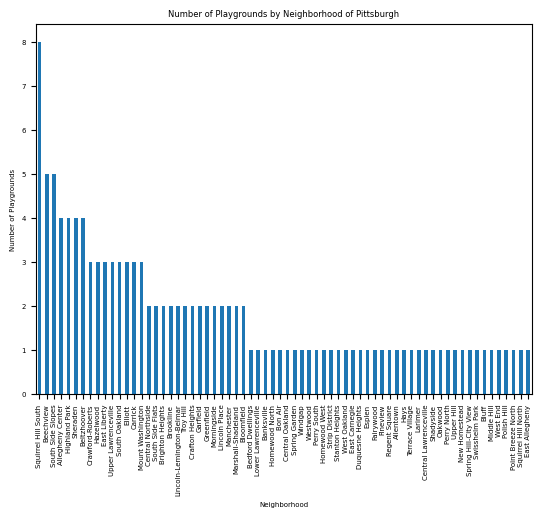

In [36]:
plt.rcParams.update({'font.size': 5})
n_series.plot.bar(rot=90)
plt.title('Number of Playgrounds by Neighborhood of Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')

Text(0, 0.5, 'Number of Playgrounds')

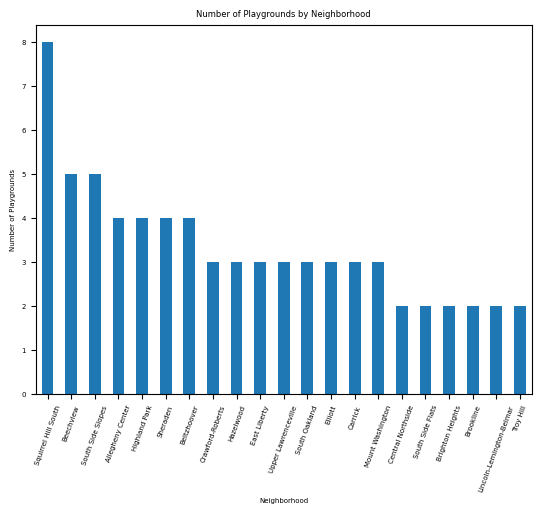

In [37]:
n_series[:21].plot.bar(rot=70)
plt.title('Number of Playgrounds by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')

Text(0, 0.5, 'Number of Playgrounds')

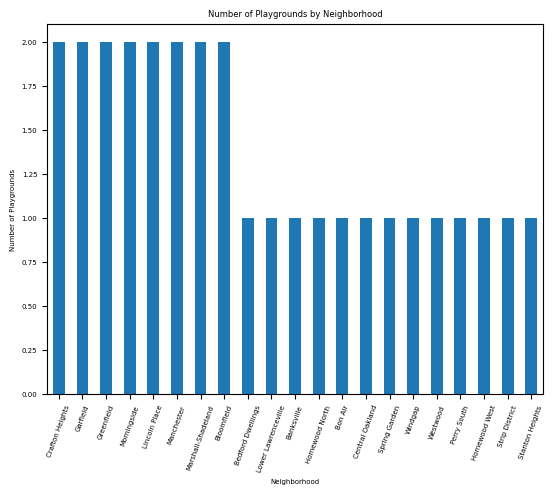

In [38]:
n_series[21:42].plot.bar(rot=70)
plt.title('Number of Playgrounds by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')

Text(0, 0.5, 'Number of Playgrounds')

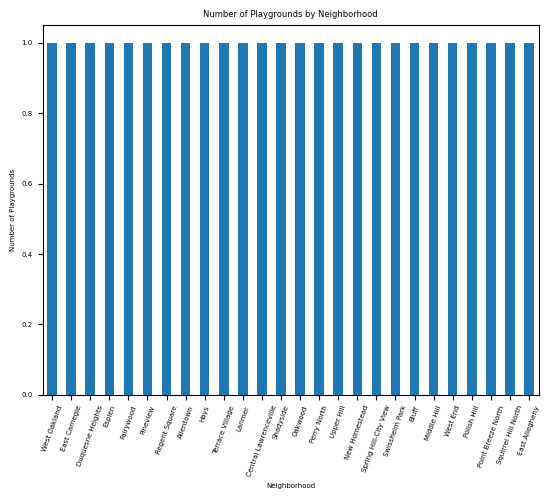

In [39]:
n_series[42:].plot.bar(rot=70)
plt.title('Number of Playgrounds by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')

In [40]:
playground_ranking = pd.DataFrame.from_dict(neighborhoods, orient='index')
playground_ranking.head(5)

,0
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Highland Park,4


## Pools

In [41]:
data = pd.read_csv('data/pools.csv')
data.head(3)    #displays first 3 lines of pools.csv


,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173


In [42]:
neighborhoods = {}

for index, row in data.iterrows():
    if row['neighborhood'] not in neighborhoods.keys():
        neighborhoods[row['neighborhood']] = 0
    neighborhoods[row['neighborhood']] += 1

neighborhoods = dict(sorted(neighborhoods.items(), key=lambda item: item[1], reverse=True))
neighborhoods

{'Highland Park': 2,
 'South Side Flats': 2,
 'Bedford Dwellings': 1,
 'Banksville': 1,
 'Beechview': 1,
 'Bloomfield': 1,
 'Hazelwood': 1,
 'Troy Hill': 1,
 'East Hills': 1,
 'Homewood South': 1,
 'Brighton Heights': 1,
 'Greenfield': 1,
 'Lincoln Place': 1,
 'Shadyside': 1,
 'Brookline': 1,
 'Carrick': 1,
 'Mount Washington': 1,
 'Perry North': 1,
 'Squirrel Hill South': 1,
 'Sheraden': 1,
 'Allegheny Center': 1,
 'Beltzhoover': 1,
 'Polish Hill': 1,
 'Westwood': 1,
 'South Side Slopes': 1,
 'Lincoln-Lemington-Belmar': 1}

Text(0, 0.5, 'Pools')

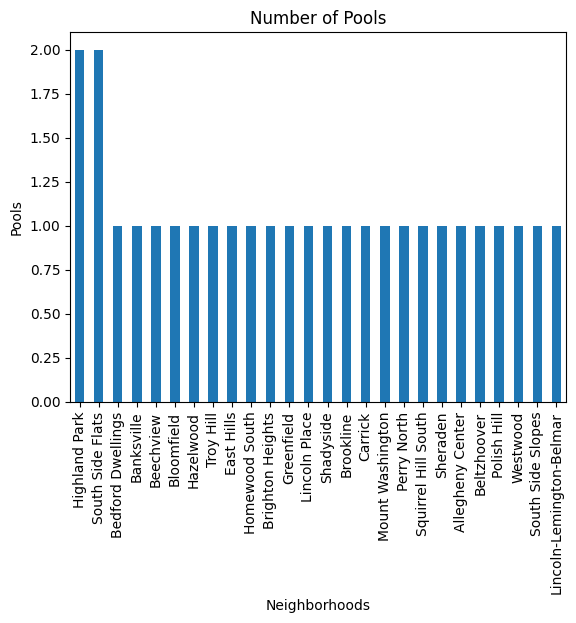

In [43]:
n_series = pd.Series(neighborhoods)
plt.rcParams.update({'font.size': 10})
n_series.plot.bar(rot=90)
plt.title('Number of Pools')
plt.xlabel('Neighborhoods')
plt.ylabel('Pools')

In [44]:
pool_ranking = pd.DataFrame.from_dict(neighborhoods, orient='index')
pool_ranking.head(20)

,0
Highland Park,2
South Side Flats,2
Bedford Dwellings,1
Banksville,1
Beechview,1
Bloomfield,1
Hazelwood,1
Troy Hill,1
East Hills,1
Homewood South,1


## Courts and Rinks

In [45]:
data = pd.read_csv('data/courts-rinks.csv')
data = data[['type', 'park', 'neighborhood']]
data.head()

,type,park,neighborhood
0,Basketball (Full),Allegheny Commons,Allegheny Center
1,Tennis,Allegheny Commons,Allegheny Center
2,Tennis,Allegheny Commons,Allegheny Center
3,Tennis,Allegheny Commons,Allegheny Center
4,Basketball (Half),Alton Park,Beechview


In [46]:
neighborhoods = {}
for index, row in data.iterrows():
    if row['neighborhood'] not in neighborhoods.keys():
        neighborhoods[row['neighborhood']] = 0
    neighborhoods[row['neighborhood']] += 1

# Sorting the neighborhoods in descending order. This is how we will get the rankings
neighborhoods = dict(sorted(neighborhoods.items(), key=lambda item: item[1], reverse=True))
neighborhoods

{'Squirrel Hill South': 26,
 'Highland Park': 20,
 'Hazelwood': 10,
 'Allegheny Center': 9,
 'Brookline': 9,
 'Beltzhoover': 9,
 'Troy Hill': 8,
 'Beechview': 7,
 'South Side Slopes': 6,
 'Lower Lawrenceville': 6,
 'East Liberty': 6,
 'Regent Square': 6,
 'Manchester': 6,
 'Sheraden': 6,
 'South Side Flats': 5,
 'Mount Washington': 5,
 'Greenfield': 5,
 'Elliott': 5,
 'Terrace Village': 5,
 'Bloomfield': 5,
 'Morningside': 4,
 'Spring Hill-City View': 4,
 'Lincoln Place': 4,
 'Banksville': 3,
 'Crafton Heights': 3,
 'Garfield': 3,
 'Carrick': 3,
 'Oakwood': 3,
 'Bedford Dwellings': 2,
 'Crawford-Roberts': 2,
 'Brighton Heights': 2,
 'Lincoln-Lemington-Belmar': 2,
 'Stanton Heights': 2,
 'Upper Lawrenceville': 2,
 'East Carnegie': 2,
 'East Hills': 2,
 'Duquesne Heights': 2,
 'Fairywood': 2,
 'Fineview': 2,
 'South Oakland': 2,
 'Point Breeze': 2,
 'Central Northside': 2,
 'Shadyside': 2,
 'New Homestead': 2,
 'Spring Garden': 2,
 'West End': 2,
 'Swisshelm Park': 2,
 'Perry North': 2,


Text(0, 0.5, 'Number of Courts and Rinks')

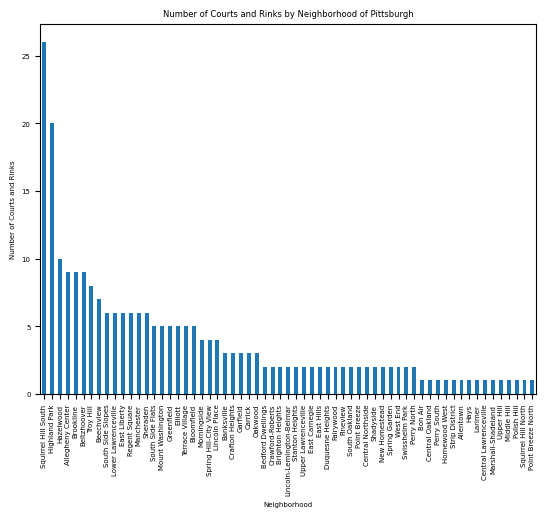

In [47]:
n_series = pd.Series(neighborhoods)
plt.rcParams.update({'font.size': 5})
n_series.plot.bar(rot=90)
plt.title('Number of Courts and Rinks by Neighborhood of Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Courts and Rinks')

Text(0, 0.5, 'Number of Courts and Rinks')

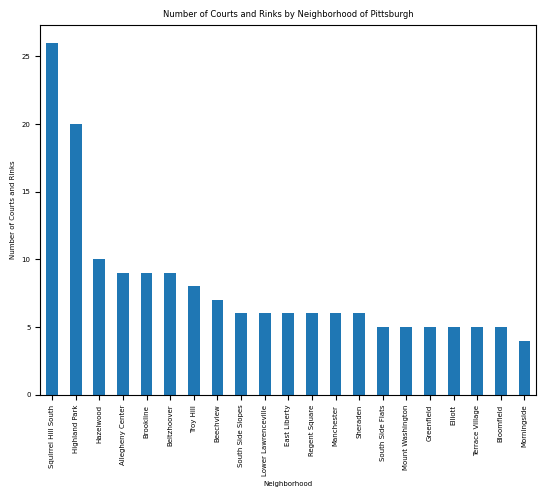

In [48]:
n_series[:21].plot.bar(rot=90)
plt.title('Number of Courts and Rinks by Neighborhood of Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Courts and Rinks')

Text(0, 0.5, 'Number of Courts and Rinks')

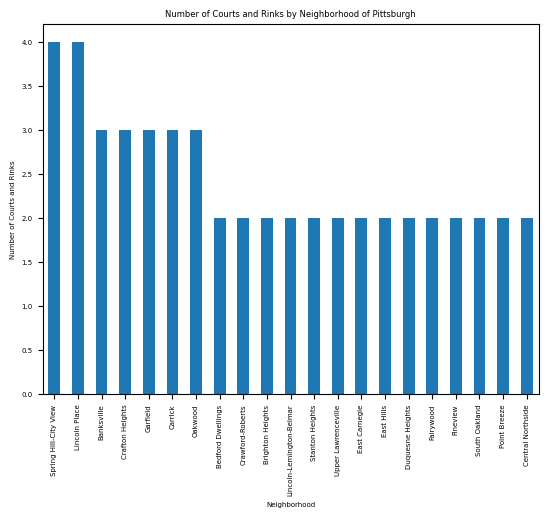

In [49]:
n_series[21:42].plot.bar(rot=90)
plt.title('Number of Courts and Rinks by Neighborhood of Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Courts and Rinks')

Text(0, 0.5, 'Number of Courts and Rinks')

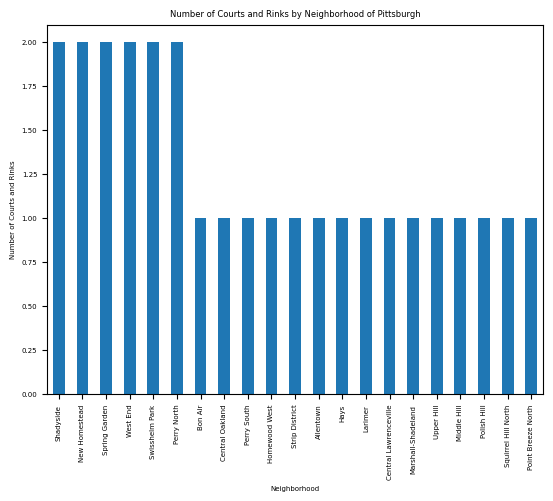

In [50]:
n_series[42:].plot.bar(rot=90)
plt.title('Number of Courts and Rinks by Neighborhood of Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Courts and Rinks')

In [51]:
court_ranking = pd.DataFrame.from_dict(neighborhoods, orient='index')
court_ranking.head(5)

,0
Squirrel Hill South,26
Highland Park,20
Hazelwood,10
Allegheny Center,9
Brookline,9


# Conclusions

In our opinion, the best neighborhood in Pittsburgh is Squirrel Hill South. It was the neighborhood with the most public playgrounds as well as the most public sports-related courts and/or rinks. While it didn't have the most public pools, it at least had one, technically means it is tied for second.


#### Max's Conclusion
Overall, there was a good distrubution of high numbers and low numbers of playgrounds in each neighborhood. Squirrel Hill South was the top one with Beechview and South Side Slopes following it. Personally my favorite park is Riverview Park which is where the town I grew up in so there is a lot of nostalgia and memories from there.

#### Joe's Conclusion
Unlike the other graphs and sub metrics, the pools graph was a bit awkward and uniform. With the exception of a couple neighborhoods like Highland Park and South Side Flats, most neighborhoods had only 0 or 1 pools. For my favorite neighborhood I would have to pick Highland Park, not only because it was the top of the pools metric but also because of personal experiences there which made it fun. 

#### Daniel's Conclusion
The numbers of sports-related courts and rinks are definitely not equally distributed. There is definitely a concentration in neighborhoods like Squirrel Hill and Highland Park, following a similar pattern as the playgrounds, which might actually be because the two are likely to appear together in larger parks. My personal favorite neighborhood, even though I grew up in Hazelwood, has to be Squirrel Hill. There's just a lot to do there from the library to the many restaurants.